<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Импорт-данных-по-ценам-акций-с-Yahoo.Finance" data-toc-modified-id="Импорт-данных-по-ценам-акций-с-Yahoo.Finance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт данных по ценам акций с Yahoo.Finance</a></span></li><li><span><a href="#Доходность" data-toc-modified-id="Доходность-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Доходность</a></span></li><li><span><a href="#Получение-месячных-доходностей" data-toc-modified-id="Получение-месячных-доходностей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Получение месячных доходностей</a></span></li><li><span><a href="#Моделирование-весов-портфеля-по-методу-Монте-Карло" data-toc-modified-id="Моделирование-весов-портфеля-по-методу-Монте-Карло-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Моделирование весов портфеля по методу Монте Карло</a></span></li><li><span><a href="#Получение-оптимального-портфеля" data-toc-modified-id="Получение-оптимального-портфеля-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Получение оптимального портфеля</a></span></li><li><span><a href="#Линия-рынка-капитала" data-toc-modified-id="Линия-рынка-капитала-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Линия рынка капитала</a></span></li><li><span><a href="#Модель-для-трех-акций" data-toc-modified-id="Модель-для-трех-акций-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Модель для трех акций</a></span></li></ul></div>

# Введение

Задание выполнено на основе примера, приведенного в книге Ив Хилпиш - "Python для финансовых расчетов" (2021).

По двум акциям получилось построить лишь линию эффективности, но не облако точек в координатах ожидаемая_доходность-риск.

Для трех же акций удалось построить и то, и другое. 

# Импорт данных по ценам акций с Yahoo.Finance
**AAL - курсы акций American Airlines-US Airways merger**

**PFE - курсы акций Pfizer, inc.**

**AMD - курсы акций компании AMD**

----

In [5]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd

AAL_data.head(): 
Attributes Adj Close  Close   High    Low   Open    Volume
Symbols          AAL    AAL    AAL    AAL    AAL       AAL
Date                                                      
2020-08-31     13.05  13.05  13.74  13.05  13.60  45917160
2020-09-01     13.10  13.10  13.84  12.66  12.86  72987504
2020-09-02     13.23  13.23  13.34  12.67  12.94  58889577
2020-09-03     13.36  13.36  14.07  13.03  13.40  86390768
2020-09-04     13.61  13.61  13.82  12.96  13.65  64936962

AAL_data.tail(): 
Attributes  Adj Close      Close       High        Low       Open    Volume
Symbols           AAL        AAL        AAL        AAL        AAL       AAL
Date                                                                       
2021-08-26  19.900000  19.900000  20.440001  19.580000  20.000000  22809450
2021-08-27  20.219999  20.219999  20.430000  19.882000  19.989300  21615079
2021-08-30  19.510000  19.510000  20.299999  19.469999  20.290001  24094331
2021-08-31  19.940001  19.940001  2

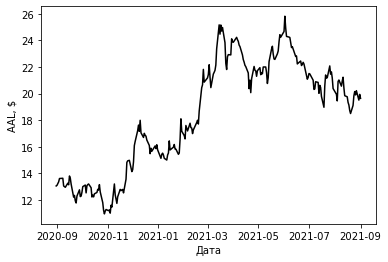

In [7]:
tickers = ['AAL']
data = pdr.data.DataReader(tickers, 'yahoo', '2020-9-01', '2021-9-01')
print(f'{tickers[0]}_data.head(): \n{data.head()}\n')
print(f'{tickers[0]}_data.tail(): \n{data.tail()}\n')
plt.plot('Close', data=data, color='black', linestyle='-')
plt.ylabel(f'{tickers[0]}, $')
plt.xlabel('Дата')
AAL=data

PFE_data.head(): 
Attributes  Adj Close      Close       High        Low       Open      Volume
Symbols           PFE        PFE        PFE        PFE        PFE         PFE
Date                                                                         
2020-08-31  34.080341  35.798492  36.016373  35.523777  35.845860  30078933.0
2020-09-01  33.259678  34.936451  35.826912  34.585949  35.798492  36217382.0
2020-09-02  33.548260  35.239586  35.334316  34.481747  34.832153  29113710.0
2020-09-03  32.826794  34.481747  35.514301  34.197556  35.400627  36012411.0
2020-09-04  32.790718  34.443851  34.699623  33.979675  34.567001  26913822.0

PFE_data.tail(): 
Attributes  Adj Close      Close       High        Low       Open      Volume
Symbols           PFE        PFE        PFE        PFE        PFE         PFE
Date                                                                         
2021-08-26  46.967728  47.380001  48.160000  47.299999  47.700001  29029316.0
2021-08-27  46.194511  46.5

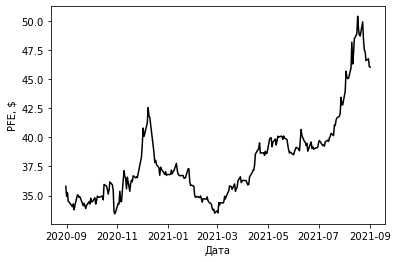

In [8]:
tickers = ['PFE']
data = pdr.data.DataReader(tickers, 'yahoo', '2020-9-01', '2021-9-01')
print(f'{tickers[0]}_data.head(): \n{data.head()}\n')
print(f'{tickers[0]}_data.tail(): \n{data.tail()}\n')
plt.plot('Close', data=data, color='black', linestyle='-')
plt.ylabel(f'{tickers[0]}, $')
plt.xlabel('Дата')
PFE=data

AMD_data.head(): 
Attributes  Adj Close      Close       High        Low       Open    Volume
Symbols           AMD        AMD        AMD        AMD        AMD       AMD
Date                                                                       
2020-08-31  90.820000  90.820000  92.639999  85.050003  85.050003  90655945
2020-09-01  92.180000  92.180000  92.510002  90.189903  91.919998  56117100
2020-09-02  90.220001  90.220001  94.279999  88.739998  94.010002  50366918
2020-09-03  82.540001  82.540001  88.470001  81.589996  87.839996  87462687
2020-09-04  82.010002  82.010002  84.389999  76.330002  81.449997  82267760

AMD_data.tail(): 
Attributes   Adj Close       Close        High         Low        Open  \
Symbols            AMD         AMD         AMD         AMD         AMD   
Date                                                                     
2021-08-26  107.269997  107.269997  109.229897  106.839996  108.570000   
2021-08-27  111.400002  111.400002  111.779999  107.800003 

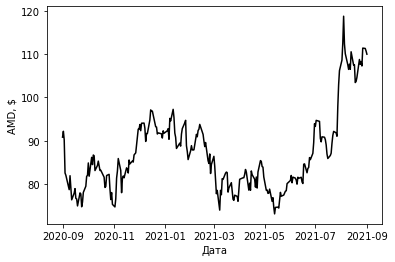

In [9]:
tickers = ['AMD']
data = pdr.data.DataReader(tickers, 'yahoo', '2020-9-01', '2021-9-01')
print(f'{tickers[0]}_data.head(): \n{data.head()}\n')
print(f'{tickers[0]}_data.tail(): \n{data.tail()}\n')
plt.plot('Close', data=data, color='black', linestyle='-')
plt.ylabel(f'{tickers[0]}, $')
plt.xlabel('Дата')
AMD=data

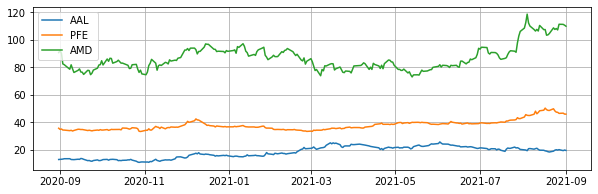

In [22]:
plt.figure(figsize=(10, 3))
plt.plot(AAL.Close,label='AAL')
plt.plot(PFE.Close,label='PFE')
plt.plot(AMD.Close,label='AMD')
plt.grid()
plt.legend()

# Доходность

Text(0.5, 1.0, 'АБСОЛЮТНАЯ ДОХОДНОСТЬ, $')

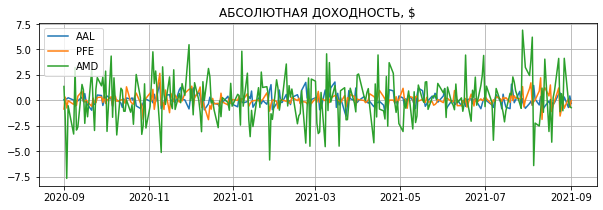

In [74]:
#АБСОЛЮТНАЯ ДОХОДНОСТЬ
plt.figure(figsize=(10, 3))
plt.plot(AAL.Close.diff(),label='AAL')
plt.plot(PFE.Close.diff(),label='PFE')
plt.plot(AMD.Close.diff(),label='AMD')
plt.grid()
plt.legend()
plt.title('АБСОЛЮТНАЯ ДОХОДНОСТЬ, $')

Text(0.5, 1.0, 'ПРОСТАЯ ДОХОДНОСТЬ, %')

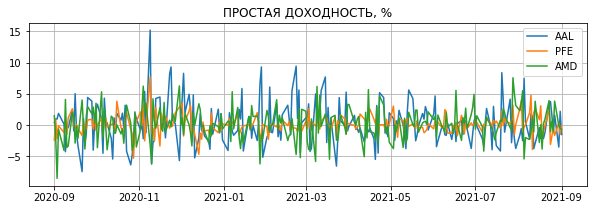

In [76]:
plt.figure(figsize=(10, 3))
plt.plot(AAL.Close.pct_change()*100,label='AAL')
plt.plot(PFE.Close.pct_change()*100,label='PFE')
plt.plot(AMD.Close.pct_change()*100,label='AMD')
plt.legend()
plt.grid()
plt.title('ПРОСТАЯ ДОХОДНОСТЬ, %')

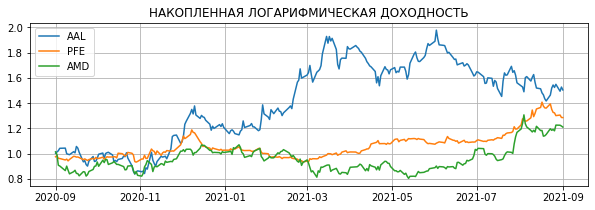

In [115]:
plt.figure(figsize=(10, 3))
plt.plot(np.log(AAL.Close/ AAL.Close.shift(1)).cumsum().apply(np.exp),label='AAL')
plt.plot(np.log(PFE.Close/ PFE.Close.shift(1)).cumsum().apply(np.exp),label='PFE')
plt.plot(np.log(AMD.Close/ AMD.Close.shift(1)).cumsum().apply(np.exp),label='AMD')
plt.title('НАКОПЛЕННАЯ ЛОГАРИФМИЧЕСКАЯ ДОХОДНОСТЬ')
plt.legend()
plt.grid()

# Получение месячных доходностей

In [123]:
#Ресемплинг по концу месяца
AAL_M=AAL.resample('1m',label='right').last()
PFE_M=PFE.resample('1m',label='right').last()
AMD_M=AMD.resample('1m',label='right').last()
ASSETS_M=pd.merge(pd.merge(AAL_M,PFE_M, left_index=True, right_index=True),AMD_M, left_index=True, right_index=True)
ASSETS_M=ASSETS_M.Close
ASSETS_M

Symbols,AAL,PFE,AMD
Date,,,
2020-08-31,13.050000,35.798492,90.820000
2020-09-30,12.290000,34.765938,81.989998
2020-10-31,11.280000,33.610229,75.290001
2020-11-30,14.130000,38.310001,92.660004
2020-12-31,15.770000,36.810001,91.709999
2021-01-31,17.170000,35.900002,85.639999
2021-02-28,20.940001,33.490002,84.510002
2021-03-31,23.900000,36.230000,78.500000
2021-04-30,21.719999,38.650002,81.620003


Text(0.5, 1.0, 'МЕСЯЧНАЯ ПРОСТАЯ ДОХОДНОСТЬ, %')

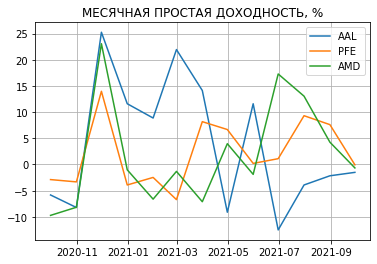

In [114]:
plt.plot(AAL_M.pct_change().Close*100,label='AAL')
plt.plot(PFE_M.pct_change().Close*100,label='PFE')
plt.plot(AMD_M.pct_change().Close*100,label='AMD')
plt.grid()
plt.legend()
plt.title('МЕСЯЧНАЯ ПРОСТАЯ ДОХОДНОСТЬ, %')

In [131]:
ASSETS_M.pct_change().dropna()

Symbols,AAL,PFE,AMD
Date,,,
2020-09-30,-0.058238,-0.028844,-0.097225
2020-10-31,-0.082181,-0.033243,-0.081717
2020-11-30,0.252660,0.139832,0.230708
2020-12-31,0.116065,-0.039154,-0.010253
2021-01-31,0.088776,-0.024722,-0.066187
2021-02-28,0.219569,-0.067131,-0.013195
2021-03-31,0.141356,0.081815,-0.071116
2021-04-30,-0.091213,0.066796,0.039745
2021-05-31,0.116022,0.002070,-0.018868


In [125]:
#КОВАРИАЦИОННАЯ МАТРИЦА
ASSETS_M.pct_change().dropna().cov()

Symbols,AAL,PFE,AMD
Symbols,,,
AAL,0.015314,0.000550,0.000632
PFE,0.000550,0.004000,0.004123
AMD,0.000632,0.004123,0.010413


In [147]:
#Логарифмическая доходность
np.log(ASSETS_M/ ASSETS_M.shift(1)).dropna()

Symbols,AAL,PFE,AMD
Symbols,,,
AAL,0.013862,0.000311,0.000168
PFE,0.000311,0.003761,0.003736
AMD,0.000168,0.003736,0.009382


array([[<AxesSubplot:title={'center':'AMD'}>,
        <AxesSubplot:title={'center':'AAL'}>],
       [<AxesSubplot:title={'center':'PFE'}>, <AxesSubplot:>]],
      dtype=object)

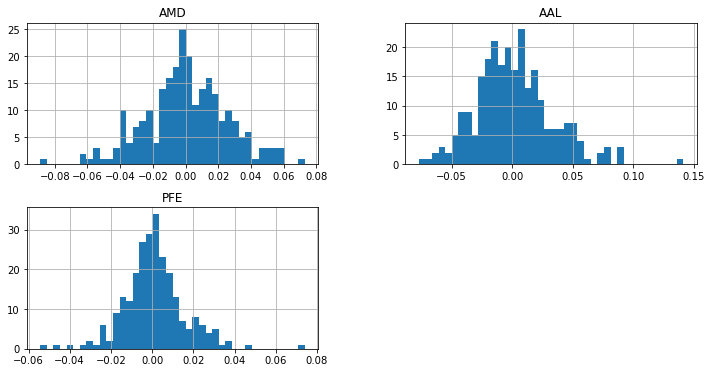

In [143]:
#ГИСТОГРАММЫ ЛОГАРИФМИЧЕСКОЙ ДНЕВНОЙ ДОХОДНОСТИ ФИНАНСОВЫХ ИНСТРУМЕНТОВ
noa = 3
data = pd.merge(AMD.Close,AAL.Close, left_index=True, right_index=True)
data = pd.merge(data,PFE.Close, left_index=True, right_index=True)
rets = np.log(data / data.shift(1) )
rets.hist(bins=40, figsize=( 12, 6))

# Моделирование весов портфеля по методу Монте Карло
*В 2020 было 253 торговых дня*

*В дальнейшем предполагается, что инвестору не разрешается открывать
короткие позиции по финансовому инструменту.*

*Разрешены только длинные позиции, а это значит, 100% инвестиционного капитала нужно распределить
между доступными инструментами так, чтобы все позиции были длинными (положительными) и в сумме составляли 100%. Располагая четырьмя инструментами, можно, например, инвестировать в них равные суммы: по 25% доступного капитала на каждый.*

*В следующем фрагменте генерируются 2 случайных числа из равномерного распределения в диапазоне от 0 до 1, после чего значения нормализуются так, чтобы их сумма равнялась 1*

In [165]:
TWO_ASSETS=pd.merge(AAL_M.Close,PFE_M.Close, left_index=True, right_index=True).pct_change().dropna()

In [167]:
rets=TWO_ASSETS

In [164]:
noa=2

In [148]:
rets=rets.dropna()

In [234]:
rets.cov()

Symbols,AAL,PFE
Symbols,,
AAL,0.015314,0.00055
PFE,0.000550,0.00400


In [235]:
#Генераця ожидаемой доходности по весам портфеля
def port_ret(i):
    return np.sum(rets.mean()* i)*253/12
#Генерация ожидаемой волатильности по весам портфеля по вектору инструментов любой длины
def port_vol(i):
    return np.sqrt(np.dot(i.T,np.dot(rets.cov()*253/12, i)))
prets = []
pvols = []
#Генерация случайных весов (2500 пар)
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets=np.array(prets)
pvols=np.array(pvols)

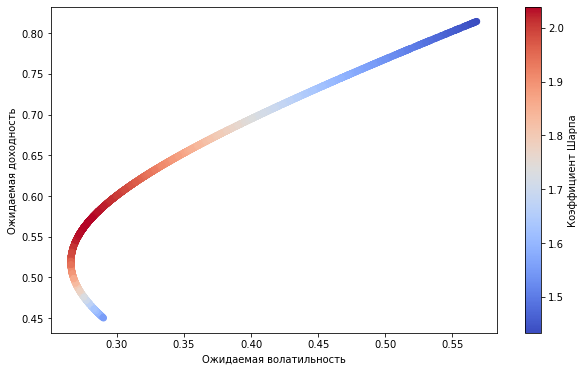

In [236]:
plt.figure(figsize=(10, 6 ) )
plt.scatter(pvols, prets, c=prets/pvols,marker= 'o' , cmap= 'coolwarm' )
plt.xlabel('Ожидаемая волатильность' )
plt.ylabel('Ожидаемая доходность' )
plt.colorbar (label= 'Коэффициент Шарпа')


# Получение оптимального портфеля

Для этого решим задачу минимизации коэффициента Шарпа

In [237]:
import scipy.optimize as sco
def min_func_sharpe(i):
    return -port_ret(i)/port_vol(i)
cons = ({'type' : 'eq', 'fun' : lambda x: np.sum( x ) - 1})
# Ограничения на веса
bnds = tuple((0 , 1) for x in range(noa))
# Предельные значения параметров
eweights = np.array(noa*[1./noa,])
eweights
min_func_sharpe(eweights)


-1.9264488169639666

In [238]:
opts = sco.minimize(min_func_sharpe, eweights,method='SLSQP', bounds=bnds,constraints=cons)
opts

     fun: -2.039401211332292
     jac: array([ 0.00068328, -0.0003196 ])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.31867578, 0.68132422])

In [239]:
print('Оптимальный портфель:')
print(opts['x'].round(3))

Оптимальный портфель:
[0.319 0.681]


In [242]:
print('Оптимум в пространстве волатильность-доходность:')
print([port_vol(opts['x']).round(3),port_ret(opts['x']).round(3)])

Оптимум в пространстве волатильность-доходность:
[0.277, 0.566]


In [240]:
# Минимизация волатильности портфеля, т.е. находим наименее волатильный портфель
optv = sco.minimize(port_vol, eweights,method='SLSQP', bounds=bnds,constraints=cons)
optv

     fun: 0.2656194158074979
     jac: array([0.26561095, 0.26562139])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.1894046, 0.8105954])

In [244]:
print('Веса наименее волатильного портфеля:')
print(optv['x'].round(3))

Веса наименее волатильного портфеля:
[0.189 0.811]


In [245]:
print('Оптимум в пространстве волатильность-доходность:')
print([port_vol(optv['x']).round(3),port_ret(optv['x']).round(3)])

Оптимум в пространстве волатильность-доходность:
[0.266, 0.519]


In [230]:
tret

0.2

In [246]:
tvols

array([0.29039765, 0.29039765, 0.29039765, 0.29039765, 0.29039765,
       0.29039765, 0.29039765, 0.29039765, 0.29039765, 0.28675077,
       0.28299448, 0.27957521, 0.27650547, 0.273797  , 0.27146064,
       0.26950604, 0.26794158, 0.2667741 , 0.26600884, 0.26564928,
       0.26569705, 0.26615195, 0.26701189, 0.26827298, 0.26992959,
       0.27197449, 0.27439902, 0.27719319, 0.28034597, 0.2838454 ,
       0.28767883, 0.29183311, 0.29629473, 0.30105003, 0.30608532,
       0.31138703, 0.31694178, 0.3227365 , 0.32875851, 0.33499556,
       0.34143585, 0.3480681 , 0.35488156, 0.36186598, 0.36901166,
       0.37630942, 0.38375057, 0.39132694, 0.39903082, 0.40685498])

In [247]:
cons = ({'type' : 'eq' , 'fun' : lambda x: port_ret(x) - tret},{'type' : 'eq' , 'fun' : lambda x: np.sum( x ) - 1}) 

In [248]:
bnds = tuple(( 0 , 1 ) for x in weights)

In [249]:
%%time
trets = np.linspace( 0.4 , 0.7, 50 )
tvols = []
for tret in trets:
    res = sco.minimize ( port_vol , eweights, method= 'SLSQP' ,bounds=bnds, constraints=cons)
    tvols.append( res[ 'fun' ])
tvols = np.array(tvols)

Wall time: 1.29 s


In [250]:
optv['x'].round(3)

array([0.189, 0.811])

In [190]:
port_vol(optv['x']).round(3)


0.204

C:\Users\enkid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


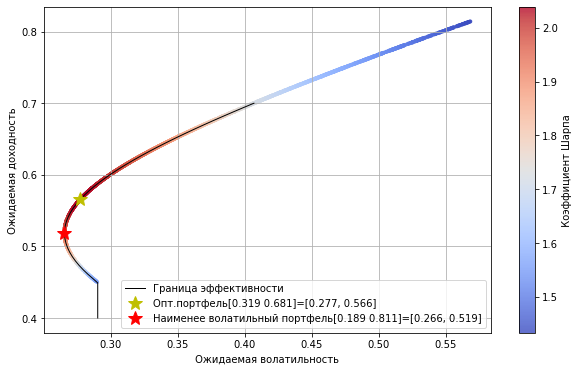

In [274]:
plt.figure(figsize=(10, 6))
plt.scatter ( pvols, prets, c=prets/pvols,marker= '.' , alpha=0.8, cmap= 'coolwarm' )
plt.plot(tvols, trets, 'b',lw=1.0,c='black',label='Граница эффективности')
plt.plot(port_vol(opts[ 'x' ]) , port_ret(opts['x' ]) ,'y*' , markersize= 15.0,
         label='Опт.портфель{}={}'.format(np.around(opts[ 'x' ],3),
                                          [round(port_vol(opts[ 'x' ]),3),
                                           round(port_ret(opts['x' ]),3)]))
plt.plot( port_vol(optv[ 'x' ]) , port_ret(optv[ 'x' ]) ,'r*' , markersize=15.0,
         label='Наименее волатильный портфель{}={}'.format(np.around(optv[ 'x' ],3),
                                          [round(port_vol(optv[ 'x' ]),3),
                                           round(port_ret(optv['x' ]),3)]))
plt.xlabel( ' Ожидаемая волатильность ' )
plt.ylabel( ' Ожидаемая доходность ' )
plt.colorbar (label= ' Коэффициент Шарпа ' )
plt.grid()
plt.legend()

# Линия рынка капитала

In [275]:
import scipy. interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]
tck = sci.splrep(evols, erets)

In [276]:
def f(x):
#Функция границы эффективности( аппроксимация сплайнами ) ' ' '
    return sci.splev(x, tck , der=0 )
def df(x):
# Первая производная функцииграницы эффективности ' ' '
    return sci.splev(x, tck, der=1)


In [277]:
def equations( p, rf=0.01):
    eql = rf - p[0]
    eq2 = rf + p[1] * p[2] - f( p[2]) 
    eq3 = p[1] - df ( p[2])
    return eql, eq2, eq3


In [278]:
opt = sco.fsolve(equations,[0.01, 0.5, 0.15])

C:\Users\enkid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


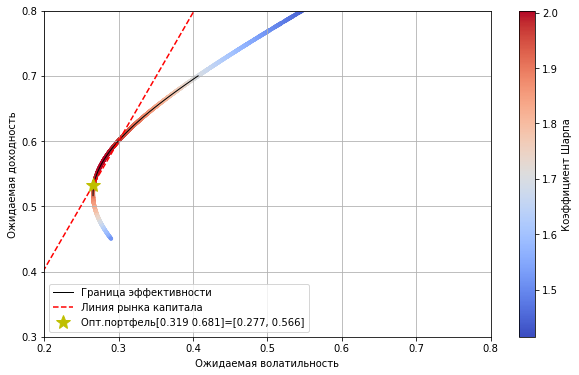

In [289]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,marker= '.', cmap= 'coolwarm' )
plt.plot(evols, erets, 'b', lw=1.0,color='black',label='Граница эффективности')
cx = np.linspace(0.0, 0.6)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5,ls='--',label='Линия рынка капитала')
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0,label='Опт.портфель{}={}'.format(np.around(opts[ 'x' ],3),
                                                                                   [round(port_vol(opts[ 'x' ]),3)
                                                                                    ,round(port_ret(opts['x' ]),3)]))
plt.grid(True)
plt.axhline(0, color= 'k', ls= '--', lw=2.8)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel( ' Ожидаемая волатильность ' )
plt.ylabel( ' Ожидаемая доходность ' )
plt.colorbar(label= ' Коэффициент Шарпа ' )
plt.xlim(0.2,0.8)
plt.ylim(0.3,0.8)
plt.legend()

# Модель для трех акций

In [293]:
TWO_ASSETS=pd.merge(AAL_M.Close,PFE_M.Close, left_index=True, right_index=True).pct_change().dropna()
THREE_ASSETS=pd.merge(AMD_M.Close,TWO_ASSETS, left_index=True, right_index=True).pct_change().dropna()
rets=THREE_ASSETS.dropna()
noa=3

In [322]:
len(rets)

12

In [323]:
#Генераця ожидаемой доходности по весам портфеля
def port_ret(i):
    return np.sum(rets.mean()* i)*253/12
#Генерация ожидаемой волатильности по весам портфеля по вектору инструментов любой длины
def port_vol(i):
    return np.sqrt(np.dot(i.T,np.dot(rets.cov()*253/12, i)))
prets = []
pvols = []
#Генерация случайных весов (2500 пар)
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets=np.array(prets)
pvols=np.array(pvols)

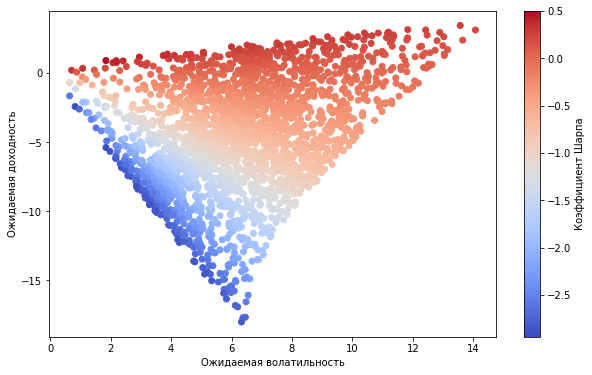

In [324]:
plt.figure(figsize=(10, 6 ) )
plt.scatter(pvols, prets, c=prets/pvols,marker= 'o' , cmap= 'coolwarm' )
plt.xlabel('Ожидаемая волатильность' )
plt.ylabel('Ожидаемая доходность' )
plt.colorbar (label= 'Коэффициент Шарпа')


In [340]:
import scipy.optimize as sco
def min_func_sharpe(i):
    return -port_ret(i)/port_vol(i)
cons = ({'type' : 'eq', 'fun' : lambda x: np.sum( x ) - 1})
# Ограничения на веса
bnds = tuple((0 , 1) for x in range(noa))
# Предельные значения параметров
eweights = np.array(noa*[1./noa,])

min_func_sharpe(eweights)


0.8070223920933809

In [342]:
eweights

array([0.33333333, 0.33333333, 0.33333333])

In [343]:
opts = sco.minimize(min_func_sharpe, eweights,method='SLSQP', bounds=bnds,constraints=cons)
opts

     fun: -1.3329612093406968
     jac: array([-1.07288361e-06,  2.76262836e+01,  1.57399476e-03])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([9.99316664e-01, 2.10922421e-13, 6.83336208e-04])

In [344]:
print('Оптимальный портфель:')
print(opts['x'].round(3))

Оптимальный портфель:
[0.999 0.    0.001]


In [345]:
print('Оптимум в пространстве волатильность-доходность:')
print([port_vol(opts['x']).round(3),port_ret(opts['x']).round(3)])

Оптимум в пространстве волатильность-доходность:
[0.461, 0.615]


In [346]:
# Минимизация волатильности портфеля, т.е. находим наименее волатильный портфель
optv = sco.minimize(port_vol, eweights,method='SLSQP', bounds=bnds,constraints=cons)
optv

     fun: 0.30841317018990055
     jac: array([0.30803641, 0.3156939 , 8.6141563 ])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([9.50791407e-01, 4.92085928e-02, 1.10283580e-15])

In [347]:
print('Веса наименее волатильного портфеля:')
print(optv['x'].round(3))

Веса наименее волатильного портфеля:
[0.951 0.049 0.   ]


In [348]:
print('Оптимум в пространстве волатильность-доходность:')
print([port_vol(optv['x']).round(3),port_ret(optv['x']).round(3)])

Оптимум в пространстве волатильность-доходность:
[0.308, -0.347]


In [350]:
cons = ({'type' : 'eq' , 'fun' : lambda x: port_ret(x) - tret},{'type' : 'eq' , 'fun' : lambda x: np.sum( x ) - 1}) 

In [351]:
bnds = tuple(( 0 , 1 ) for x in weights)

In [352]:
%%time
trets = np.linspace( 0.4 , 0.7, 50 )
tvols = []
for tret in trets:
    res = sco.minimize ( port_vol , eweights, method= 'SLSQP' ,bounds=bnds, constraints=cons)
    tvols.append( res[ 'fun' ])
tvols = np.array(tvols)

Wall time: 957 ms


C:\Users\enkid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


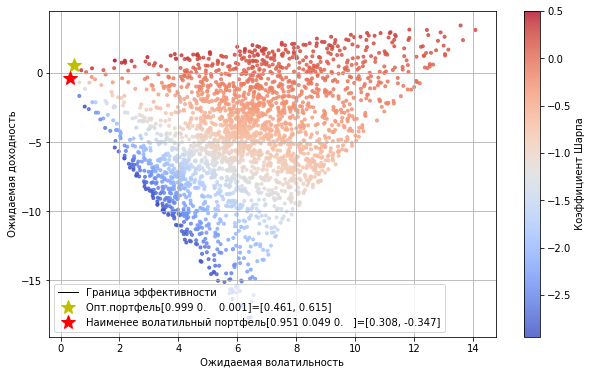

In [355]:
plt.figure(figsize=(10, 6))
plt.scatter ( pvols, prets, c=prets/pvols,marker= '.' , alpha=0.8, cmap= 'coolwarm' )
plt.plot(tvols, trets, 'b',lw=1.0,c='black',label='Граница эффективности')
plt.plot(port_vol(opts[ 'x' ]) , port_ret(opts['x' ]) ,'y*' , markersize= 15.0,
         label='Опт.портфель{}={}'.format(np.around(opts[ 'x' ],3),
                                          [round(port_vol(opts[ 'x' ]),3),
                                           round(port_ret(opts['x' ]),3)]))
plt.plot( port_vol(optv[ 'x' ]) , port_ret(optv[ 'x' ]) ,'r*' , markersize=15.0,
         label='Наименее волатильный портфель{}={}'.format(np.around(optv[ 'x' ],3),
                                          [round(port_vol(optv[ 'x' ]),3),
                                           round(port_ret(optv['x' ]),3)]))
plt.xlabel( ' Ожидаемая волатильность ' )
plt.ylabel( ' Ожидаемая доходность ' )
plt.colorbar (label= ' Коэффициент Шарпа ' )
plt.grid()
plt.legend()

In [356]:
import scipy. interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]
tck = sci.splrep(evols, erets)

In [357]:
def f(x):
#Функция границы эффективности( аппроксимация сплайнами ) ' ' '
    return sci.splev(x, tck , der=0 )
def df(x):
# Первая производная функцииграницы эффективности ' ' '
    return sci.splev(x, tck, der=1)


In [358]:
def equations( p, rf=0.01):
    eql = rf - p[0]
    eq2 = rf + p[1] * p[2] - f( p[2]) 
    eq3 = p[1] - df ( p[2])
    return eql, eq2, eq3


In [360]:
opt = sco.fsolve(equations,[0.01, 0.9, 0.15])

C:\Users\enkid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


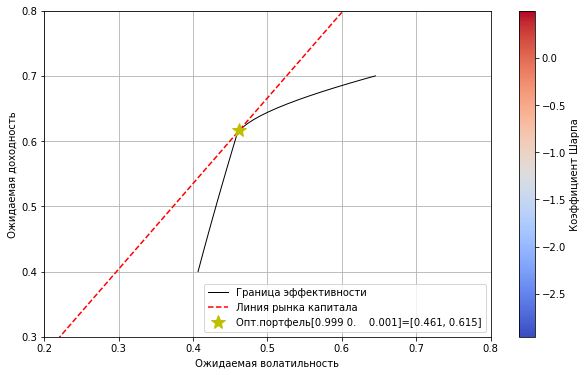

In [361]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,marker= '.', cmap= 'coolwarm' )
plt.plot(evols, erets, 'b', lw=1.0,color='black',label='Граница эффективности')
cx = np.linspace(0.0, 0.6)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5,ls='--',label='Линия рынка капитала')
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0,label='Опт.портфель{}={}'.format(np.around(opts[ 'x' ],3),
                                                                                   [round(port_vol(opts[ 'x' ]),3)
                                                                                    ,round(port_ret(opts['x' ]),3)]))
plt.grid(True)
plt.axhline(0, color= 'k', ls= '--', lw=2.8)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel( ' Ожидаемая волатильность ' )
plt.ylabel( ' Ожидаемая доходность ' )
plt.colorbar(label= ' Коэффициент Шарпа ' )
plt.xlim(0.2,0.8)
plt.ylim(0.3,0.8)
plt.legend()